In [8]:
import pandas as pd
import numpy as np

from sklearn.ensemble.iforest import IsolationForest
from sklearn.datasets import make_classification


X, y = make_classification(
        n_samples=1000,
        n_features=5,
        n_informative=3,
)

X = pd.DataFrame(X, columns=['f1', 'f2', 'f3', 'f4', 'f5'])

model = IsolationForest(behaviour='new')

model.fit(X)


default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.


IsolationForest(behaviour='new', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [9]:
import shap

In [10]:
explainer = shap.TreeExplainer(model, data=X)

In [11]:
shap_values = explainer.shap_values(X)

100%|===================| 996/1000 [01:06<00:00]        

In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

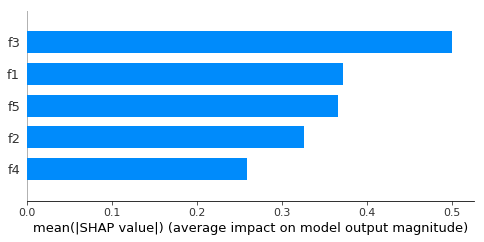

In [19]:
shap.summary_plot(shap_values, X, plot_type='bar')

11.615792244772138